In [1]:
import pandas as pd
import yaml
import seaborn as sns
import numpy as np
import re

# Loading data

## groups
This is a dataframe with a two level multiindex as both index and columns

+ Columns:
    + Group name
    + Vote type ('+', '-', '0')
+ Index:
    + Day code (PV-8-yyyy-mm-dd)
    + Vote number

All cells are filled

In [2]:
groups = pd.read_csv('FinalData/GroupRecord.csv', 
                     index_col=[0,1], 
                     header=[0,1]).astype('UInt16').sort_index()
groups

ALDE        ECR         EFDD        ENF  ...  NI  PPE  \
                        +  0   -   +   -   0    +  0   -   +  ...   0    +   
Day             Vote                                          ...            
PV-8-2014-07-16 1      57  1   3  17  40   3    3  2  27   0  ...   0  190   
                2       6  0  57   1  58   1   40  0   0   0  ...   3    1   
                3       2  1  61   0  57   2   43  0   1   0  ...  10    0   
                4       0  0  65   1  57   1   42  2   1   0  ...   5    0   
                5      64  0   1  49   9   3    2  4  39   0  ...   2  201   
...                   ... ..  ..  ..  ..  ..  ... ..  ..  ..  ...  ..  ...   
PV-8-2019-04-18 40     56  0   0  55   1   0   17  1  10  20  ...   0  143   
                41     55  0   0   6  49   0   18  9   0  14  ...   1    7   
                42     53  0   2  51   4   0   17  9   1  20  ...   0  141   
                43      0  0  54   0  56   0   24  2   1  21  ...   5    2   
                44     53  0   0  14   9  33   19  8   0  16  ...   0  138   

                              S&D         Verts/ALE          
                        -  0    +    -  0         +   -   0  
Day             Vote                                         
PV-8-2014-07-16 1       0  2  151    3  3         3  30  12  
                2     194  0   11  163  3         8  39   1  
                3     199  0    5  170  0        47   1   0  
                4     200  0    3  172  2        44   0   4  
                5       0  0  180    1  0        47   1   1  
...                   ... ..  ...  ... ..       ...  ..  ..  
PV-8-2019-04-18 40      0  0  129    0  0        44   0   0  
                41    136  0  128    1  0        44   0   0  
                42      2  0  129    0  0        44   0   0  
                43    140  0    2  126  1         0  44   0  
                44      0  0  127    0  0        42   0   0  

[10253 rows x 27 columns]

## individual
This dataframe describes how each MEP voted

Columns:
+ One for each MEP which cast at least one vote
Index:
+ Same as the index for `groups`

The cells are filled with:
+ -1 if the MEP voted against
+ 0 if the MEP abstained
+ 1 if the MEP voted for
+ NA if the MEP didn't vote

In [3]:
individual = pd.read_csv('FinalData/Correct_names.csv',
                         index_col=[0,1]).astype('Int8').sort_index()
individual

Nedzhmi ALI  Jean ARTHUIS  Johannes Cornelis van BAALEN  \
Day             Vote                                                            
PV-8-2014-07-16 1               1             1                             1   
                2              -1             1                             1   
                3              -1             1                            -1   
                4              -1            -1                            -1   
                5               1             1                             1   
...                           ...           ...                           ...   
PV-8-2019-04-18 40              1             1                             1   
                41              1             1                             1   
                42              1             1                             1   
                43             -1            -1                            -1   
                44              1             1                             1   

                      Beatriz BECERRA BASTERRECHEA  Izaskun BILBAO BARANDICA  \
Day             Vote                                                           
PV-8-2014-07-16 1                                1                         1   
                2                               -1                        -1   
                3                               -1                        -1   
                4                               -1                        -1   
                5                                1                         1   
...                                            ...                       ...   
PV-8-2019-04-18 40                               1                         1   
                41                               1                         1   
                42                               1                         1   
                43                              -1                        -1   
                44                               1                         1   

                      David BORRELLI  Jean-Marie CAVADA  Dita CHARANZOVÁ  \
Day             Vote                                                       
PV-8-2014-07-16 1               <NA>                  1             <NA>   
                2                  1                 -1                1   
                3                  1                 -1                0   
                4                  1                 -1               -1   
                5                  0                  1                1   
...                              ...                ...              ...   
PV-8-2019-04-18 40                 1                  1                1   
                41                 1                  1                1   
                42                 1                  1                1   
                43              <NA>                 -1               -1   
                44              <NA>                  1                1   

                      Gérard DEPREZ  Martina DLABAJOVÁ  ...  \
Day             Vote                                    ...   
PV-8-2014-07-16 1                 1                  1  ...   
                2                -1                 -1  ...   
                3                -1                 -1  ...   
                4                -1                 -1  ...   
                5                 1                  1  ...   
...                             ...                ...  ...   
PV-8-2019-04-18 40                1                  1  ...   
                41                1                  1  ...   
                42                1                  1  ...   
                43               -1                 -1  ...   
                44                1                  1  ...   

                      Iveta GRIGULE-PĒTERSE  Constance LE GRIP  \
Day             Vote                                

## descrizioni_voti
This dataframe associates each vote to its description and, where present, the code of the document being voted on

Columns:
+ Descr: The description as presented in the RCV file
+ Code: Either a document code or `NA`

Index: the same as the previous indexes

In [4]:
descrizioni_voti = pd.read_csv('FinalData/Descrizioni.csv', 
                               index_col=[0,1]).astype('string').sort_index()
descrizioni_voti

Descr  \
Day             Vote                                                      
PV-8-2014-07-16 1     Appointment of four Members of the European Co...   
                2            A8-0001/2014 – Werner Langen – Amendment 4   
                3            A8-0001/2014 – Werner Langen – Amendment 1   
                4            A8-0001/2014 – Werner Langen – Amendment 3   
                5     A8-0001/2014 – Werner Langen – Legislative res...   
...                                                                 ...   
PV-8-2019-04-18 40                                 B8-0241/2019 - § 7/1   
                41                                 B8-0241/2019 - § 7/2   
                42                                  B8-0241/2019 - Am 4   
                43                                  B8-0241/2019 - Am 5   
                44                            B8-0241/2019 - Resolution   

                              Code  
Day             Vote                
PV-8-2014-07-16 1             <NA>  
                2     A8-0001/2014  
                3     A8-0001/2014  
                4     A8-0001/2014  
                5     A8-0001/2014  
...                            ...  
PV-8-2019-04-18 40    B8-0241/2019  
                41    B8-0241/2019  
                42    B8-0241/2019  
                43    B8-0241/2019  
                44    B8-0241/2019  

[10253 rows x 2 columns]

## descr
This dataframe associates to each document code the Legislative Procedure it is a part of

Columns:
+ CodeProc: the code procedure
+ DescrProc: the description of the procedure
+ Link: the link to the legislative procedure in the Parliament's legislative observatory

Index:
+ The codes from the code column in `descrizioni_voti`

In [5]:
descr = pd.read_csv('FinalData/DescriptionsWithLink.csv', 
                    index_col=0).astype('string')
descr

CodeProc  \
Code                               
B8-0255/2019      2019/2690(RSP)   
B8-0242/2019      2019/2692(RSP)   
A8-0192/2019     2019/0805(CNS)*   
A8-0386/2018  2016/0397(COD)***I   
A8-0354/2018  2018/0143(COD)***I   
...                          ...   
B8-0025/2014      2014/2717(RSP)   
B8-0027/2014      2014/2713(RSP)   
B8-0059/2014      2014/2716(RSP)   
B8-0071/2014      2014/2723(RSP)   
A8-0001/2014     2014/0170(NLE)*   

                                                      DescrProc  \
Code                                                              
B8-0255/2019  Resolution on China, notably the situation of ...   
B8-0242/2019                               Resolution on Brunei   
A8-0192/2019  Eurojust: agreement on judicial cooperation in...   
A8-0386/2018  Coordination of social security systems: benefits   
A8-0354/2018  New heavy-duty vehicles: CO2 emission performa...   
...                                                         ...   
B8-0025/2014                              Resolution on Ukraine   
B8-0027/2014                     Resolution on youth employment   
B8-0059/2014                Resolution on the situation in Iraq   
B8-0071/2014  Resolution on the escalation of violence betwe...   
A8-0001/2014  Adoption by Lithuania of the euro on 1 January...   

                                                           Link  
Code                                                             
B8-0255/2019  https://oeil.secure.europarl.europa.eu/oeil//p...  
B8-0242/2019  https://oeil.secure.europarl.europa.eu/oeil//p...  
A8-0192/2019  https://oeil.secure.europarl.europa.eu/oeil//p...  
A8-0386/2018  https://oeil.secure.europarl.europa.eu/oeil//p...  
A8-0354/2018  https://oeil.secure.europarl.europa.eu/oeil//p...  
...                                                         ...  
B8-0025/2014  https://oeil.secure.europarl.europa.eu/oeil//p...  
B8-0027/2014  https://oeil.secure.europarl.europa.eu/oeil//p...  
B8-0059/2014  https://oeil.secure.europarl.europa.eu/oeil//p...  
B8-0071/2014  https://oeil.secure.europarl.europa.eu/oeil//p...  
A8-0001/2014  https://oeil.secure.europarl.europa.eu/oeil//p...  

[2192 rows x 3 columns]

## link_subj_map
A dataframe where each link from the `Link` column in `descr` is associated with a subject code
Columns:
+ Link: the link from `descr["Link"]`
+ Subject: a subject code

In [6]:
link_subj_map = pd.read_csv('FinalData/LinkSubjectDF.csv', index_col=0)
link_subj_map

Link     Subject
0     https://oeil.secure.europarl.europa.eu/oeil//p...  6.40.04.06
1     https://oeil.secure.europarl.europa.eu/oeil//p...  3.20.15.02
2     https://oeil.secure.europarl.europa.eu/oeil//p...  3.20.15.02
3     https://oeil.secure.europarl.europa.eu/oeil//p...  3.20.15.02
4     https://oeil.secure.europarl.europa.eu/oeil//p...  6.40.05.04
...                                                 ...         ...
3985  https://oeil.secure.europarl.europa.eu/oeil//p...     3.70.13
3986  https://oeil.secure.europarl.europa.eu/oeil//p...     4.20.05
3987  https://oeil.secure.europarl.europa.eu/oeil//p...     6.10.08
3988  https://oeil.secure.europarl.europa.eu/oeil//p...     6.10.09
3989  https://oeil.secure.europarl.europa.eu/oeil//p...     6.10.09

[3990 rows x 2 columns]

# subject_list
The meaning of the subject codes

In [7]:
subject_list = pd.read_csv('FinalData/subjects.csv')
subject_list

code                                              label
0          1                               European citizenship
1       1.10           Fundamental rights in the Union, Charter
2       1.20                                   Citizen's rights
3    1.20.01  Political rights, right to vote and to stand i...
4    1.20.02                         Social and economic rights
..       ...                                                ...
431  8.70.53                                        2013 budget
432  8.70.54                                        2014 budget
433  8.70.55                                        2015 budget
434  8.70.60                            Previous annual budgets
435  8.70.70                             Flexibility instrument

[436 rows x 2 columns]

## mep_info_df
A dataframe containing all information for each MEP

Columns:
+ Nation: the MEP's member nation
+ Group: the parliamentary group
+ BaseUrl: the full url of the MEP, all urls are relative to `europarl.europa.eu`

Index: the columns of `individual`

In [8]:
mep_info_df = pd.read_csv('FinalData/MepInfo.csv', index_col=0)
mep_info_df

Nation  \
Name                                           
Nedzhmi ALI                         Bulgaria   
Jean ARTHUIS                          France   
Johannes Cornelis van BAALEN     Netherlands   
Beatriz BECERRA BASTERRECHEA           Spain   
Izaskun BILBAO BARANDICA               Spain   
...                                      ...   
Luis de GRANDES PASCUAL                Spain   
Esther de LANGE                  Netherlands   
Bodil VALERO                          Sweden   
Paloma LÓPEZ BERMEJO                   Spain   
Neena GILL                    United Kingdom   

                                                                          Group  \
Name                                                                              
Nedzhmi ALI                   Group of the Alliance of Liberals and Democrat...   
Jean ARTHUIS                  Group of the Alliance of Liberals and Democrat...   
Johannes Cornelis van BAALEN  Group of the Alliance of Liberals and Democrat...   
Beatriz BECERRA BASTERRECHEA  Group of the Alliance of Liberals and Democrat...   
Izaskun BILBAO BARANDICA      Group of the Alliance of Liberals and Democrat...   
...                                                                         ...   
Luis de GRANDES PASCUAL       Group of the European People's Party (Christia...   
Esther de LANGE               Group of the European People's Party (Christia...   
Bodil VALERO                         Group of the Greens/European Free Alliance   
Paloma LÓPEZ BERMEJO               Confederal Group of the European United Left   
Neena GILL                    Group of the Progressive Alliance of Socialist...   

                                                                        BaseUrl  
Name                                                                             
Nedzhmi ALI                                     /meps/en/34250/NEDZHMI_ALI/home  
Jean ARTHUIS                                  /meps/en/124773/JEAN_ARTHUIS/home  
Johannes Cornelis van BAALEN   /meps/en/96937/JOHANNES+CORNELIS_VAN+BAALEN/home  
Beatriz BECERRA BASTERRECHEA  /meps/en/125040/BEATRIZ_BECERRA+BASTERRECHEA/home  
Izaskun BILBAO BARANDICA           /meps/en/96922/IZASKUN_BILBAO+BARANDICA/home  
...                                                                         ...  
Luis de GRANDES PASCUAL             /meps/en/28393/LUIS_DE+GRANDES+PASCUAL/home  
Esther de LANGE                             /meps/en/38398/ESTHER_DE+LANGE/home  
Bodil VALERO                                  /meps/en/124993/BODIL_VALERO/home  
Paloma LÓPEZ BERMEJO                  /meps/en/125047/PALOMA_LOPEZ+BERMEJO/home  
Neena GILL                                        /meps/en/4533/NEENA_GILL/home  

[854 rows x 3 columns]

In [9]:
meps = pd.Series(mep_info_df.index)

# Examples
## Selecting only the last votes

Let's consider only the last vote on any given document

In [10]:
data_used = individual
last_votes = descrizioni_voti.drop_duplicates('Code', keep='last').index
data_used = data_used.loc[last_votes]
data_used

Nedzhmi ALI  Jean ARTHUIS  Johannes Cornelis van BAALEN  \
Day             Vote                                                            
PV-8-2014-07-16 5               1             1                             1   
PV-8-2014-07-17 2               1          <NA>                             1   
                10              1             1                             1   
                27              1             1                             0   
                28             -1            -1                            -1   
...                           ...           ...                           ...   
PV-8-2019-04-18 35              1             1                             1   
                36              1             1                             1   
                37              1             1                             1   
                38              1             1                             1   
                44              1             1                             1   

                      Beatriz BECERRA BASTERRECHEA  Izaskun BILBAO BARANDICA  \
Day             Vote                                                           
PV-8-2014-07-16 5                                1                         1   
PV-8-2014-07-17 2                                1                         1   
                10                               1                         0   
                27                               1                         1   
                28                              -1                         1   
...                                            ...                       ...   
PV-8-2019-04-18 35                               1                         1   
                36                               1                         1   
                37                               1                         1   
                38                               1                         1   
                44                               1                         1   

                      David BORRELLI  Jean-Marie CAVADA  Dita CHARANZOVÁ  \
Day             Vote                                                       
PV-8-2014-07-16 5                  0                  1                1   
PV-8-2014-07-17 2                  1                  1                1   
                10                -1                  1                1   
                27                 1                  1                1   
                28                 1                 -1               -1   
...                              ...                ...              ...   
PV-8-2019-04-18 35                 1                  1                1   
                36                 1                  1                1   
                37                 1                  1                1   
                38              <NA>                  1                1   
                44              <NA>                  1                1   

                      Gérard DEPREZ  Martina DLABAJOVÁ  ...  \
Day             Vote                                    ...   
PV-8-2014-07-16 5                 1                  1  ...   
PV-8-2014-07-17 2                 1                  1  ...   
                10                1                  1  ...   
                27                1                  1  ...   
                28               -1                 -1  ...   
...                             ...                ...  ...   
PV-8-2019-04-18 35                1                  1  ...   
                36                1                  1  ...   
                37                1                  1  ...   
                38                1                  1  ...   
                44                1                  1  ...   

                      Iveta GRIGULE-PĒTERSE  Constance LE GRIP  \
Day             Vote                                

## Only votes on the internal market

In [11]:
# Find all topics under 7.10 or 7.30
codes = subject_list[subject_list['code'].str.contains('^2', regex=True)]['code']
# Find all links connected to that
links = link_subj_map.merge(codes,
                             left_on='Subject', right_on='code')['Link']
# Find all documents connected to links
docs = descr.reset_index().merge(links)['Code']
# find votes connected to documents
ind = descrizioni_voti.dropna().reset_index().merge(docs).set_index(['Day','Vote']).index
ind = ind.drop_duplicates()
cand_vot_spec = individual.loc[ind]
cand_vot_spec

Nedzhmi ALI  Jean ARTHUIS  Johannes Cornelis van BAALEN  \
Day             Vote                                                            
PV-8-2014-11-26 1               1             1                             1   
PV-8-2014-11-27 7               1             1                          <NA>   
                28              1             1                          <NA>   
                29              1             1                          <NA>   
                30              1             1                          <NA>   
...                           ...           ...                           ...   
PV-8-2019-04-18 30              1             1                             1   
                31              1             1                             1   
                34              1             1                             1   
                37              1             1                             1   
                38              1             1                             1   

                      Beatriz BECERRA BASTERRECHEA  Izaskun BILBAO BARANDICA  \
Day             Vote                                                           
PV-8-2014-11-26 1                                1                         1   
PV-8-2014-11-27 7                                1                         1   
                28                               1                         1   
                29                               1                         1   
                30                               1                         1   
...                                            ...                       ...   
PV-8-2019-04-18 30                               1                         1   
                31                               1                         1   
                34                               1                         1   
                37                               1                         1   
                38                               1                         1   

                      David BORRELLI  Jean-Marie CAVADA  Dita CHARANZOVÁ  \
Day             Vote                                                       
PV-8-2014-11-26 1                 -1                  1                1   
PV-8-2014-11-27 7                 -1                  1                1   
                28                 1                  1                1   
                29                 0                  1                1   
                30                -1                  1                1   
...                              ...                ...              ...   
PV-8-2019-04-18 30                 1                  1                1   
                31                 1                  1                1   
                34                 1                  1                1   
                37                 1                  1                1   
                38              <NA>                  1                1   

                      Gérard DEPREZ  Martina DLABAJOVÁ  ...  \
Day             Vote                                    ...   
PV-8-2014-11-26 1                 1                  1  ...   
PV-8-2014-11-27 7                 1                  1  ...   
                28                1                  1  ...   
                29                1                  1  ...   
                30                1                  1  ...   
...                             ...                ...  ...   
PV-8-2019-04-18 30                1                  1  ...   
                31                1                  1  ...   
                34                1                  1  ...   
                37                1                  1  ...   
                38                1                  1  ...   

                      Iveta GRIGULE-PĒTERSE  Constance LE GRIP  \
Day             Vote                                

# Mapping the voting profile of each MEP

In [12]:
data_used = individual

In [13]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

v = data_used.fillna(0).corr()
meps = pd.Series(v.index, name='Mep')
dis = np.abs(v.applymap(lambda x: -(x-1)))

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
posO = mds.fit(dis)
pos = posO.embedding_
pos

array([[ 0.30031964,  0.27705107],
       [ 0.268865  ,  0.24447119],
       [ 0.32564496,  0.46955105],
       ...,
       [ 0.28426501, -0.49964705],
       [ 0.1111033 , -0.81080856],
       [ 0.29571781, -0.07668818]])

In [14]:
pos_df = pd.DataFrame(pos, index=mep_info_df.index)
pos_df = pd.concat([mep_info_df, pos_df], axis=1)
pos_df

Nation  \
Name                                           
Nedzhmi ALI                         Bulgaria   
Jean ARTHUIS                          France   
Johannes Cornelis van BAALEN     Netherlands   
Beatriz BECERRA BASTERRECHEA           Spain   
Izaskun BILBAO BARANDICA               Spain   
...                                      ...   
Luis de GRANDES PASCUAL                Spain   
Esther de LANGE                  Netherlands   
Bodil VALERO                          Sweden   
Paloma LÓPEZ BERMEJO                   Spain   
Neena GILL                    United Kingdom   

                                                                          Group  \
Name                                                                              
Nedzhmi ALI                   Group of the Alliance of Liberals and Democrat...   
Jean ARTHUIS                  Group of the Alliance of Liberals and Democrat...   
Johannes Cornelis van BAALEN  Group of the Alliance of Liberals and Democrat...   
Beatriz BECERRA BASTERRECHEA  Group of the Alliance of Liberals and Democrat...   
Izaskun BILBAO BARANDICA      Group of the Alliance of Liberals and Democrat...   
...                                                                         ...   
Luis de GRANDES PASCUAL       Group of the European People's Party (Christia...   
Esther de LANGE               Group of the European People's Party (Christia...   
Bodil VALERO                         Group of the Greens/European Free Alliance   
Paloma LÓPEZ BERMEJO               Confederal Group of the European United Left   
Neena GILL                    Group of the Progressive Alliance of Socialist...   

                                                                        BaseUrl  \
Name                                                                              
Nedzhmi ALI                                     /meps/en/34250/NEDZHMI_ALI/home   
Jean ARTHUIS                                  /meps/en/124773/JEAN_ARTHUIS/home   
Johannes Cornelis van BAALEN   /meps/en/96937/JOHANNES+CORNELIS_VAN+BAALEN/home   
Beatriz BECERRA BASTERRECHEA  /meps/en/125040/BEATRIZ_BECERRA+BASTERRECHEA/home   
Izaskun BILBAO BARANDICA           /meps/en/96922/IZASKUN_BILBAO+BARANDICA/home   
...                                                                         ...   
Luis de GRANDES PASCUAL             /meps/en/28393/LUIS_DE+GRANDES+PASCUAL/home   
Esther de LANGE                             /meps/en/38398/ESTHER_DE+LANGE/home   
Bodil VALERO                                  /meps/en/124993/BODIL_VALERO/home   
Paloma LÓPEZ BERMEJO                  /meps/en/125047/PALOMA_LOPEZ+BERMEJO/home   
Neena GILL                                        /meps/en/4533/NEENA_GILL/home   

                                     0         1  
Name                                              
Nedzhmi ALI                   0.300320  0.277051  
Jean ARTHUIS                  0.268865  0.244471  
Johannes Cornelis van BAALEN  0.325645  0.469551  
Beatriz BECERRA BASTERRECHEA  0.313934  0.205710  
Izaskun BILBAO BARANDICA      0.357889  0.195513  
...                                ...       ...  
Luis de GRANDES PASCUAL       0.113445  0.425701  
Esther de LANGE               0.038357  0.332385  
Bodil VALERO                  0.284265 -0.499647  
Paloma LÓPEZ BERMEJO          0.111103 -0.810809  
Neena GILL                    0.295718 -0.076688  

[854 rows x 5 columns]

Let's plot the data and colour it based on the group

<IPython.core.display.Javascript object>


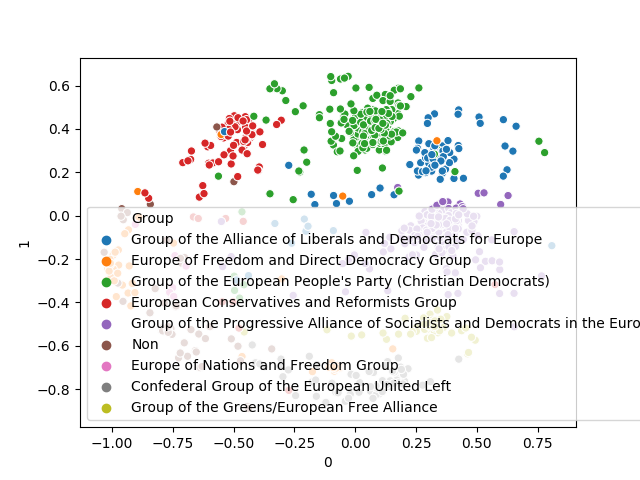

In [21]:
%matplotlib notebook
g =sns.scatterplot(data=pos_df, x=0, y=1, 
               hue='Group')

Let's do the same but with the nation to determine the colour and style of the dot

First we'll create a legend

In [16]:
marks_list = "^<>v.Xsd"
styles = list(marks_list*4)
cols = list("A"*7+"B"*7+"C"*7+"D"*7)
nats = sorted(pos_df['Nation'].unique())
n = list(zip(nats, styles,cols))
df_leg = pd.DataFrame(n)
df_leg = df_leg.rename(columns={1:'mark',0:'Nation',2:'color'})
df_leg

Nation mark color
0          Austria    ^     A
1          Belgium    <     A
2         Bulgaria    >     A
3          Croatia    v     A
4           Cyprus    .     A
5          Czechia    X     A
6          Denmark    s     A
7          Estonia    d     B
8          Finland    ^     B
9           France    <     B
10         Germany    >     B
11          Greece    v     B
12         Hungary    .     B
13         Ireland    X     B
14           Italy    s     C
15          Latvia    d     C
16       Lithuania    ^     C
17      Luxembourg    <     C
18           Malta    >     C
19     Netherlands    v     C
20          Poland    .     C
21        Portugal    X     D
22         Romania    s     D
23        Slovakia    d     D
24        Slovenia    ^     D
25           Spain    <     D
26          Sweden    >     D
27  United Kingdom    v     D

And now the plot

<IPython.core.display.Javascript object>


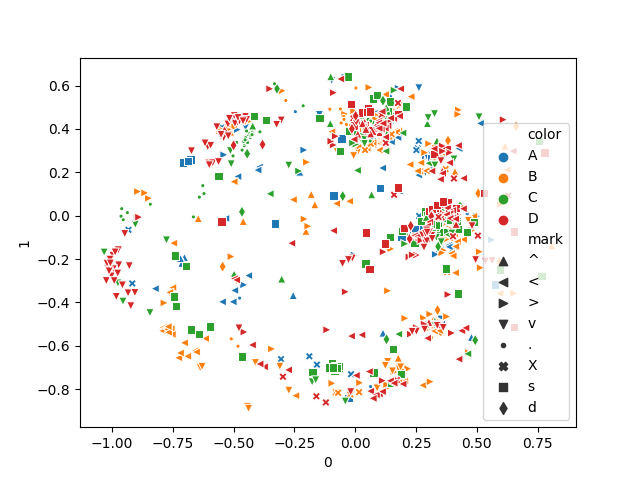

In [22]:
%matplotlib notebook
sns.scatterplot(data=pd.merge(df_leg, pos_df), x=0, y=1, 
               hue='color',
               markers={i:i for i in marks_list},
               style='mark'
               )

### Other plots

<IPython.core.display.Javascript object>


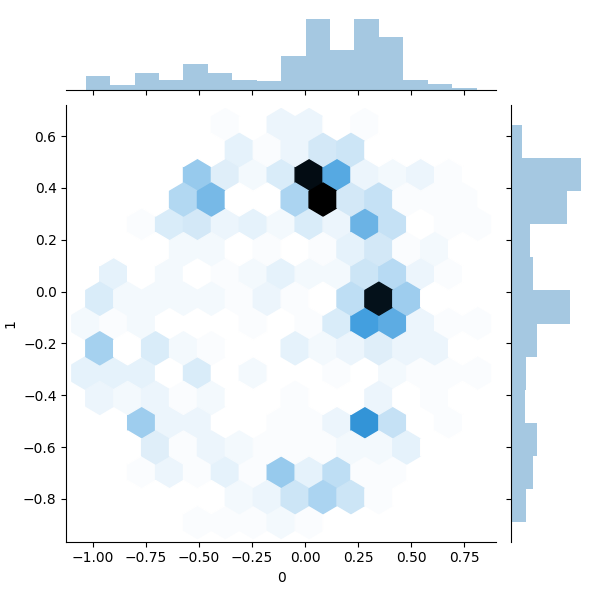

In [23]:
%matplotlib notebook
sns.jointplot(x=0,y=1,data=pos_df, 
              kind="hex")

<IPython.core.display.Javascript object>


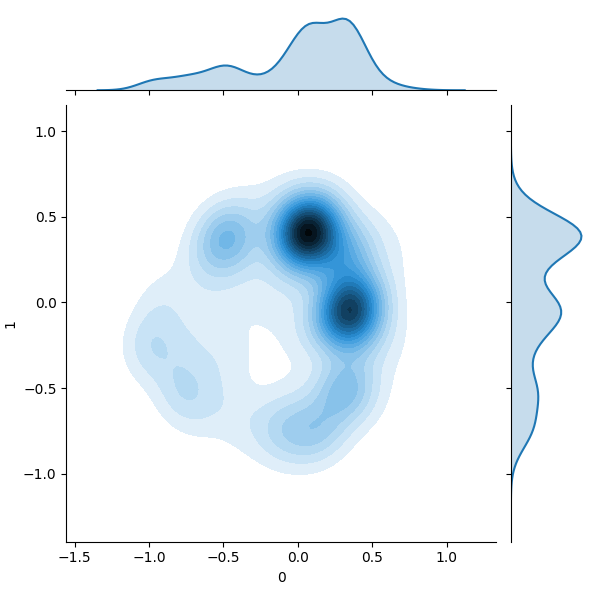

In [24]:
%matplotlib notebook
sns.jointplot(x=0,y=1,data=pos_df, 
              kind="kde",
              levels=20,
              shade_lowest=False)

Let's plot only some countries

<IPython.core.display.Javascript object>


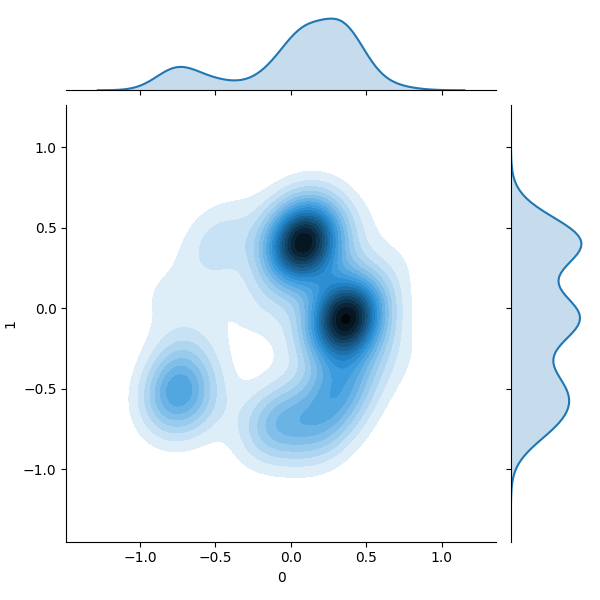

In [20]:
%matplotlib notebook
sns.jointplot(x=0,y=1,data=pos_df[pos_df['Nation'].isin(['Germany','Italy','France'])], 
              kind="kde", 
              levels=20,
              shade_lowest=False)